## CNN with MNIST Data Set

   these are practice along codes from Udemy Tensorflow bootcamp

### Basic Approach - Exploration of MNIST Data

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.num_examples

55000

In [6]:
mnist.test.num_examples

10000

In [7]:
mnist.validation.num_examples

5000

In [8]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

    ### Visualizing data

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
mnist.train.images[1].shape

(784,)

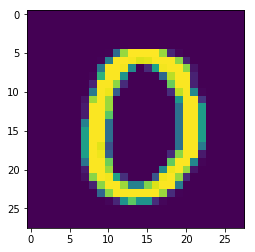

In [11]:
plt.imshow(mnist.train.images[10].reshape(28,28))

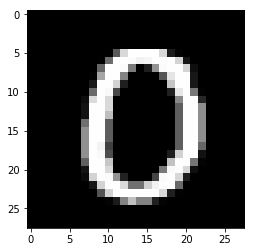

In [16]:
plt.imshow(mnist.train.images[10].reshape(28,28),cmap='gist_gray')

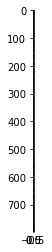

In [17]:
plt.imshow(mnist.train.images[10].reshape(784,1))

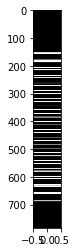

In [19]:
plt.imshow(mnist.train.images[10].reshape(784,1),cmap='gist_gray',aspect=0.01)

## Create a Model

In [20]:
x = tf.placeholder(tf.float32,shape=[None,784])

In [21]:
w = tf.Variable(tf.zeros([784,10])) # 10 because 0-9 possible numbers 

In [23]:
b = tf.Variable(tf.zeros([10]))

In [24]:
y = tf.matmul(x,w) + b

    ## Loss Function & Optimizer

In [25]:
y_true = tf.placeholder(tf.float32,[None,10])

In [26]:
# Cross Entropy
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))

In [27]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

In [28]:
train = optimizer.minimize(cross_entropy)

## Create Session

In [29]:
init = tf.global_variables_initializer()

In [31]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(10000): #train the model 10000 times
        batch_x, batch_y = mnist.train.next_batch(100)
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
        
    
    # test the train model
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    
    print(sess.run(acc,feed_dict={x:mnist.test.images, y_true:mnist.test.labels}))

0.9244


    ## this NN model for 10000 times training gives us 0.9244 accuracy. 
    ## We will try CNN network to see whether we can get better accuracy than this. 

## CNN with MNIST data set

    ## Helper functions
    ## Initialize random weights for fully conncected or convolutional layers

In [32]:
#initialize random weights
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape,stddev=0.1)
    return tf.Variable(init_random_dist)

In [33]:
#for biases
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

In [34]:
#2D convolution using built in conv2d from TF
def conv2d(x,W):
    return tf.nn.conv2d(x,W, strides=[1,1,1,1], padding='SAME')

In [36]:
#Max pooling layer using built in TF functions
def max_pool_2by2(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],
                         strides=[1,2,2,1], padding='SAME')

In [37]:
# convolutional layer using ReLu activation
def convolutional_layer(input_x, shape):
    w = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, w) + b)

In [38]:
# Normal Fully connected layer
def normal_full_layer(input_layer,size):
    input_size = int(input_layer.get_shape()[1])
    w = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, w) + b

## Placeholders

In [39]:
x = tf.placeholder(tf.float32, shape=[None,784])

In [40]:
y_true = tf.placeholder(tf.float32, shape=[None,10]) #0-9 equals total 10 numbers

## Layers

In [41]:
x_image = tf.reshape(x,[-1,28,28,1])

In [42]:
convo_1 = convolutional_layer(x_image,shape=[6,6,1,32])
convo_1_pooling = max_pool_2by2(convo_1)

In [43]:
convo_2 = convolutional_layer(convo_1_pooling, shape=[6,6,32,64])
convo_2_pooling = max_pool_2by2(convo_2)

In [45]:
convo_2_flat = tf.reshape(convo_2_pooling,[-1,7*7*64])
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,1024))

In [46]:
hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_one, keep_prob=hold_prob)

In [47]:
y_pred = normal_full_layer(full_one_dropout,10)

## Loss Function

In [48]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))

## Optimizer

In [49]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
train = optimizer.minimize(cross_entropy)

## Initialize Variable

In [50]:
init = tf.global_variables_initializer()

## Session

In [52]:
#If you have a powerful computer - you can run if for more steps. 
steps = 4000

with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(steps):
        
        batch_x , batch_y = mnist.train.next_batch(50)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y,hold_prob:0.5})
        
        # PRINT OUT A MESSAGE EVERY 500 STEPS
        if i%500 == 0:
            
            print('Currently on step {}'.format(i))
            print('Accuracy is:')
            # Test the Train Model
            matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))

            acc = tf.reduce_mean(tf.cast(matches,tf.float32))

            print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels,hold_prob:1.0}))
            print('\n')

Currently on step 0
Accuracy is:
0.184


Currently on step 500
Accuracy is:
0.9473


Currently on step 1000
Accuracy is:
0.9619


Currently on step 1500
Accuracy is:
0.9717


Currently on step 2000
Accuracy is:
0.9766


Currently on step 2500
Accuracy is:
0.9784


Currently on step 3000
Accuracy is:
0.9813


Currently on step 3500
Accuracy is:
0.9835


